In [1]:
import numpy as np
from sklearn.datasets  import make_blobs

In [2]:
X, _ = make_blobs(n_samples=10, centers=3, n_features=2, cluster_std=0.2, random_state=0)
print(X)

[[ 1.00507879  4.59464203]
 [ 1.12847762  4.32812233]
 [ 2.11788106  0.72684451]
 [ 0.95562631  4.38590703]
 [-1.35401677  2.76944926]
 [-1.07295309  2.62700913]
 [-2.03750198  3.04860598]
 [ 2.35408334  0.85663201]
 [ 2.14404017  0.96439853]
 [ 1.16628776  4.27351589]]


In [3]:
import pandas as pd

obj_names = []
for i in range(1, 11):
    obj = "Object" + str(i)
    obj_names.append(obj)

# Create a Pandas Datagrame with the names and (x, y) coordinates
data = pd.DataFrame({
    'Object': obj_names,
    'X_value': X[:, 0],
    'Y_value': X[:, -1]
})

# Preview the data
print(data.head())

    Object   X_value   Y_value
0  Object1  1.005079  4.594642
1  Object2  1.128478  4.328122
2  Object3  2.117881  0.726845
3  Object4  0.955626  4.385907
4  Object5 -1.354017  2.769449


In [4]:
# Initialize the centroids
c1 = (-1, 4)
c2 = (-0.2, 1.5)
c3 = (2, 2.5)

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

/Users/harley/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [6]:
# Print the cluster centroids
print(kmeans.cluster_centers_)
# Print the cluster labels
print(kmeans.labels_)

[[-1.48815728  2.81502145]
 [ 2.20533486  0.84929168]
 [ 1.06386762  4.39554682]]
[2 2 1 2 0 0 0 1 1 2]


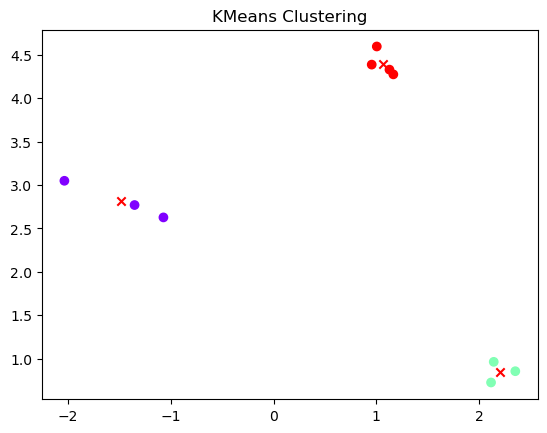

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, -1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x')
plt.title('KMeans Clustering')
plt.show()

In [8]:
from sklearn.metrics import silhouette_score

print(silhouette_score(X, kmeans.labels_))

0.8810668519873337


/Users/harley/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/harley/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/harley/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/harley/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

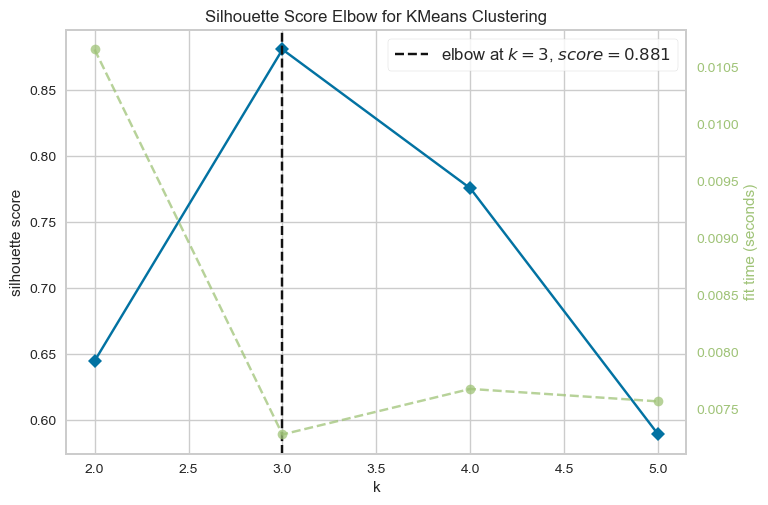

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [16]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=0)

visualizer = KElbowVisualizer(model, k=(2, 6), metric='silhouette', timings='False')

visualizer.fit(X)
visualizer.poof()